In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("data/raw/house_price_regression_dataset.csv")

In [8]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [9]:
df.shape

(1000, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [11]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [13]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [14]:
X = df.drop("House_Price", axis=1)
y = df["House_Price"]

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, r2_lr

(np.float64(10071.484424137032), 0.9984263636823414)

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dt = DecisionTreeRegressor(random_state=42)

In [29]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
y_pred_dt = dt.predict(X_test)

In [31]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

rmse_dt, r2_dt

(np.float64(31092.682403812778), 0.9850019850992495)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)

In [34]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [35]:
y_pred_rf = rf.predict(X_test)

In [36]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf

(np.float64(19703.06630033403), 0.9939773858987893)

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
cv_scores = cross_val_score(LinearRegression(), X, y, scoring="r2", cv=5)

cv_scores, cv_scores.mean()

(array([0.99846133, 0.99849083, 0.99849944, 0.99846019, 0.9985438 ]),
 np.float64(0.9984911165291177))

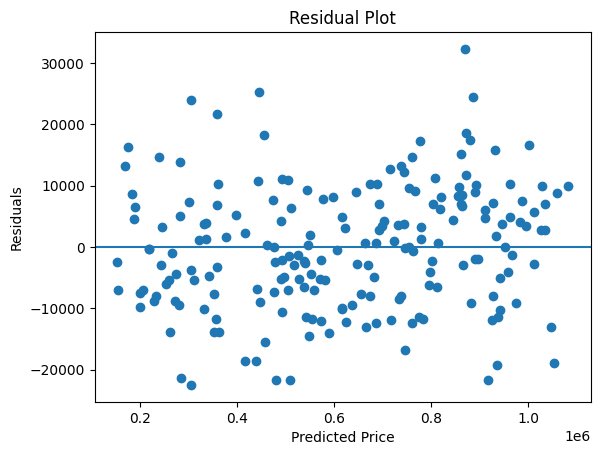

In [39]:
residuals = y_test - y_pred_lr

plt.figure()
plt.scatter(y_pred_lr, residuals)
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [40]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importance

Square_Footage          0.985984
Year_Built              0.005530
Lot_Size                0.005142
Num_Bedrooms            0.001666
Neighborhood_Quality    0.000695
Num_Bathrooms           0.000555
Garage_Size             0.000428
dtype: float64

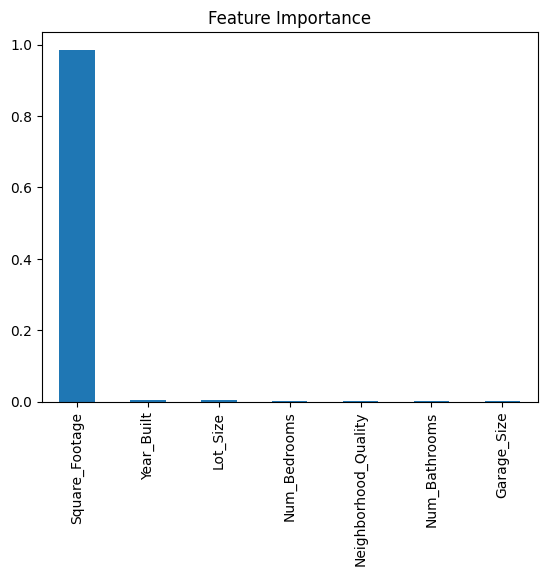

In [41]:
feature_importance.plot(kind="bar", title="Feature Importance")
plt.show()

In [42]:
import joblib

In [43]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(lr, "house_price_model.pkl")

['house_price_model.pkl']

In [44]:
import sys
sys.executable

'/Users/rohanbhardwaj/Documents/ml_projects/House Price Prediction Regression/venv/bin/python3'